In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-14 20:29:11.755305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 20:29:11.755389: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load, merge, and subset data

<Item title:"SAC_Pond_Physical_RT" type:Feature Layer Collection owner:Anooshi>
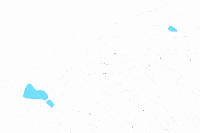

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('2ae818c396ed4ae6a76001d93f92ec96')

layer = output['data0']
records = output['table0']
feature_service = output['feature_service']

In [3]:
# Merge related table and feature layer
data = layer.merge(records, left_on='GlobalID', right_on='Ref_to_Ponds', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Ponds'])
data = data.rename(columns={'GlobalID_y':'Record_GlobalID', 'OBJECTID_y':'Record_ObjectID','OBJECTID_x':'Feature_ObjectID'})
data.head()

,Feature_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,Temp_Time,Surface_Temp,Bottom_Temp,Erosion_Sed,Comments,Record_GlobalID,Sur_Bot_Dep,Sur_Out_Dep,Total_Depth,Pond_Bottom_Firmness,Sediment_Accumulation,Graze_Effects,Structural_Conditions
0,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",58,2017-11-16 11:02:07.000000000,MarinaOlson,JoyStewart,Rusty Hutto,"54 degrees, overcast skies",2017-11-16 11:00:33,56.0,56.0,New erosion evidence at established slump eros...,"Surface to outlet: 9ft, 6 inches (114 inches),...",e5d8433a-479d-416e-81f9-aa1750627395,33.0,114.00,147.0,None,None,None,None
1,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",59,2018-02-23 10:05:46.000000000,RustyHutto,MarinaOlson,None,"Cold, windy, clear skies. 47°",NaT,NaN,NaN,None,None,921bf76b-6c52-48c9-87f8-2e10bf951b4a,0.0,79.00,0.0,None,None,None,None
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",60,2018-03-31 09:28:51.369999872,RustyHutto,JacksonSabol,None,"Sunny, 80, slightly overcast",NaT,NaN,NaN,Heavy erosion from cattle trampling and slump,Pond water is brown from cattle presence and s...,fec9e2b0-2627-4322-b79c-04773ee6f924,0.0,71.00,0.0,None,None,Limited impact to pond transition zone. Water ...,None
3,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",61,2018-04-28 10:00:51.000000000,MarinaOlson,MasonHolmes,None,"55 degrees F, 60% cloud cover, winds 0-5mph, n...",2018-04-28 10:00:19,72.0,69.0,"Moderate sedimentation (feels soft/muddy), cat...",Italian thistle is ubiquitous along the northe...,be7bf187-b18e-4f26-90ce-df669a1a9a49,65.0,91.75,157.0,Moderate - Appears to contain 2‐6 inches of se...,Moderate sediment accumulation,Very little grazing pressure. Moderate amout o...,None
4,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",62,2018-07-25 09:23:51.000000000,RogerStephens,RussellHuddleston,None,"Sunny, clear, 83",NaT,NaN,NaN,Heavy erosion from cattle trampling and slump,None,336d8112-51ca-4577-87a0-59b5b88b660d,0.0,132.00,0.0,None,Limited accumulation,Limited impact to pond transition zone. Water ...,None


In [4]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)


Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 6


# QAQC

In [5]:
QAQC_whitespace(data, exclude_cols=['Comments', 'Graze_Effects', 'Structural_Conditions', 'Erosion_Sed','Weather'], objectID = ['Record_ObjectID'])



Analysis for: Pond_Bottom_Firmness
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Record_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Pond
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Sediment_Accumulation
No \xa0 characters found
No double spaces found
No triple spaces

In [6]:
find_blank_entries(data, exclude_cols=['Additional_Surveyors','Sur_Bot_Dep','Graze_Effects','Bottom_Temp','Temp_Time',
                                      'Pond_Bottom_Firmness','Total_Depth','Erosion_Sed','Comments','Structural_Conditions',
                                      'Surveyor_2','Surface_Temp','Sediment_Accumulation'])

Blank Sur_Out_Dep entrie(s) exist!


,Feature_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,Temp_Time,Surface_Temp,Bottom_Temp,Erosion_Sed,Comments,Record_GlobalID,Sur_Bot_Dep,Sur_Out_Dep,Total_Depth,Pond_Bottom_Firmness,Sediment_Accumulation,Graze_Effects,Structural_Conditions
11,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",71,2021-07-29 20:21:08.016,Roger Stephens,,,"Partly cloudy, mid 80’s, wind 1-5 mph",NaT,NaN,NaN,,"Pond completely dry, did not fill at all this year.",40c25f78-5775-4f05-8326-9a45ce75a89b,NaN,NaN,NaN,,,,
12,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",76,2021-08-17 20:02:08.000,Silas Ellison,Kurt Lutz,Niel Gapal,"Sunny, hazy, 10 mph wind, 72 F",2021-08-17 20:02:36,NaN,NaN,"Heavy erosion from cattle trampling, pronounced terracettes, and s...",Pond is completely dry with heavy trampling visible around pond ma...,51da8d5d-3173-4204-925f-29b883cb920a,NaN,NaN,NaN,None,None,Heavily used cattle trails and cattle trampling around the pond.,"2021: some burrows present at base of levee on downstream side, bu..."
24,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",75,2021-08-17 17:47:44.000,Kurt Lutz,Silas Ellison,Niel Gapal,"Hazy, 74F, 10mph wind",NaT,NaN,NaN,Active cattle trail around entire pond. Bare ground and loose soil...,6 adult bullfrogs in southwestern corner of pond. Pond depth appro...,c55081ae-bcf5-4e2c-a4bb-71e610aab5c1,NaN,NaN,NaN,"Soft - Appears to give (contain), greater than 6 inches of sediment",Moderate sediment accumulation,"Grass around pond grazed to the ground, reducing soil stability. V...",2021: Reduced pond depth has exposed rock drop off in levees.
38,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",70,2020-01-15 19:13:00.000,Janel Mayo,Ryan Anderson,None,"48 degrees, 40% cloud cover, wind 0-5 mph",2020-01-16 00:14:31,NaN,NaN,None,"Wet date. Pounding in UCP, pond is very trampled by cattle. Turbid...",0ffe67f2-d73c-495d-bcff-164ba0706b85,NaN,NaN,NaN,None,None,None,None
39,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",72,2021-07-29 17:24:43.000,Roger Stephens,,,"Partly cloudy, low 80’s, wind 1-5 mph",NaT,NaN,NaN,,Pond completely dry.,e507d312-6fd5-4964-a218-8d2d8bc055af,NaN,NaN,NaN,,,,
40,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",74,2021-08-17 18:51:15.000,Other,Kurt Lutz,Silas Ellison,"72F, 10mph",NaT,NaN,NaN,Heavily trampled by cattle,Other-Niel Gapal,1281ee1b-3c20-478e-95cd-cece3e443631,NaN,NaN,NaN,Firm - Appears to contain 0‐2 inches of sediment,None,High levels of grazing,2 culverts at the NW end of pond


Blank Weather entrie(s) exist!


,Feature_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,Temp_Time,Surface_Temp,Bottom_Temp,Erosion_Sed,Comments,Record_GlobalID,Sur_Bot_Dep,Sur_Out_Dep,Total_Depth,Pond_Bottom_Firmness,Sediment_Accumulation,Graze_Effects,Structural_Conditions
6,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",64,2018-08-30 08:44:24,RustyHutto,JacksonSabol,None,None,NaT,NaN,NaN,None,Pond observed dry on this date. Official dry date.,1ec01fe0-bab0-4be9-b734-1e50570b99aa,0.0,0.0,0.0,None,None,None,None
25,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",35,2017-10-03 09:30:00,JoyStewart,RustyHutto,None,None,NaT,NaN,NaN,None,Pond dry,b95e6c8c-e01d-429e-95ad-989b8db35b47,0.0,0.0,0.0,None,None,None,None


No blank Shape__Length
No blank Surveyor_1
No blank BHR_Site
No blank Shape__Area
No blank Record_GlobalID
No blank SHAPE
No blank Pond
No blank Feature_ObjectID
No blank Observation_Date
No blank Record_ObjectID


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


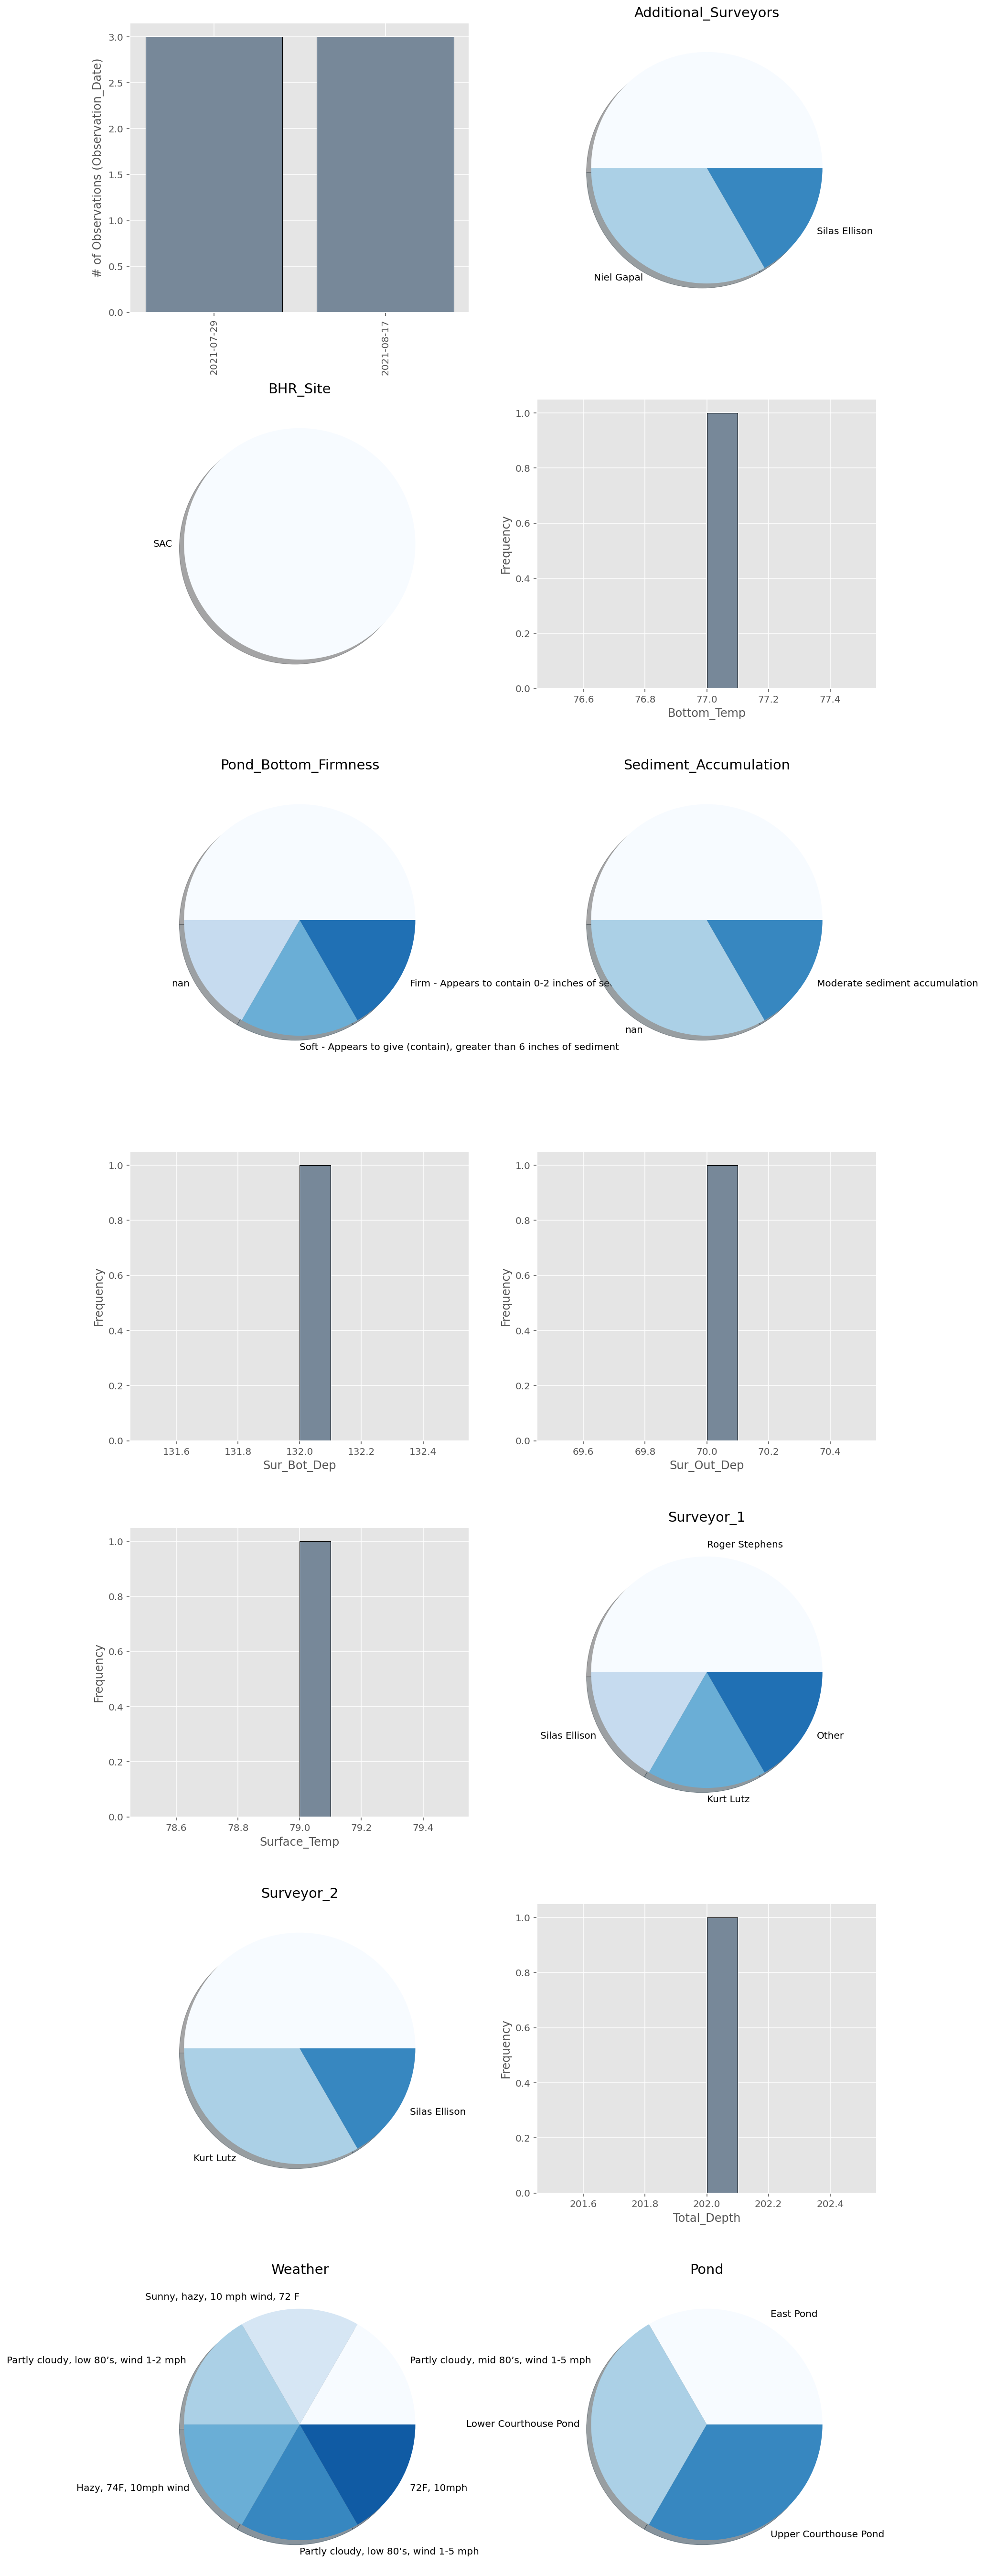

In [7]:
QAQC_plot(sub, ['Observation_Date','Additional_Surveyors', 'BHR_Site', 'Bottom_Temp', 
       'Pond_Bottom_Firmness', 'Sediment_Accumulation',
       'Sur_Bot_Dep', 'Sur_Out_Dep', 'Surface_Temp',
       'Surveyor_1', 'Surveyor_2', 'Total_Depth', 'Weather',
       'Pond'])

# Export Deliverable

In [8]:
field_order = [
    'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
    'Additional_Surveyors', 'Pond', 'Weather', 'Temp_Time', 'Surface_Temp',
    'Bottom_Temp', 'Sur_Bot_Dep', 'Sur_Out_Dep', 'Total_Depth',
    'Pond_Bottom_Firmness', 'Sediment_Accumulation', 'Graze_Effects',
    'Erosion_Sed', 'Structural_Conditions', 'Comments', 'Feature_ObjectID',
    'Record_ObjectID', 'Record_GlobalID', 'SHAPE', 'Shape__Area',
    'Shape__Length'
]

In [9]:
export_data_deliverable(data, feature_service, field_order, layer_num=0, file_name='SAC_Ponds_Physical_Conditions')

Exported to Outputs/SAC_Ponds_Physical_Conditions_Data_20211014.xlsx
